<a href="https://colab.research.google.com/github/Moeinh77/Ames-housing-data-ML/blob/master/Ames_Housing_Data_KBestFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
import numpy as np
import pandas as pd
from feature_selector import FeatureSelector

In [0]:
data=pd.read_csv('train.csv')
outSideData=pd.read_csv('test.csv')

y=data['SalePrice']
X=data.loc[:, data.columns != 'SalePrice']

In [0]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Most of data lies between 1000 - 4000 price positively skewed

median < mean
difference: 17921.19589041095


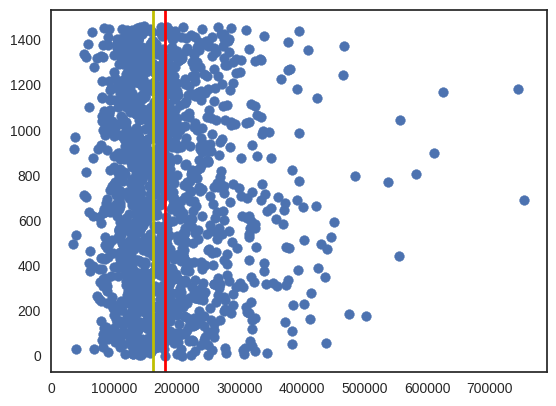

In [0]:
#check for skewed data
from matplotlib import pyplot as plt
print("median < mean\ndifference:",np.mean(y)-np.median(y))
plt.scatter(y,range(len(y)))

plt.axvline(np.median(y),linewidth=2, color='y')
plt.axvline(np.mean(y),linewidth=2, color='r')
plt.show()



median < mean
difference: 0.02254578017900144


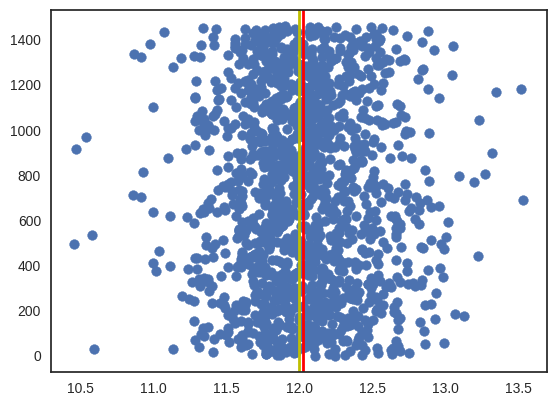

In [0]:
y_logged=np.log1p(y)
print("median < mean\ndifference:",np.mean(y_logged)-np.median(y_logged))

plt.scatter(y_logged,range(len(y)))

plt.axvline(np.median(y_logged),linewidth=2, color='y')
plt.axvline(np.mean(y_logged),linewidth=2, color='r')
plt.show()

### Filling N/As based on data description

In [0]:
# Alley : data description says NA means "no alley access"
X.loc[:, "Alley"] = X.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
X.loc[:, "BedroomAbvGr"] = X.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
X.loc[:, "BsmtQual"] = X.loc[:, "BsmtQual"].fillna("No")
X.loc[:, "BsmtCond"] = X.loc[:, "BsmtCond"].fillna("No")
X.loc[:, "BsmtExposure"] = X.loc[:, "BsmtExposure"].fillna("No")
X.loc[:, "BsmtFinType1"] = X.loc[:, "BsmtFinType1"].fillna("No")
X.loc[:, "BsmtFinType2"] = X.loc[:, "BsmtFinType2"].fillna("No")
X.loc[:, "BsmtFullBath"] = X.loc[:, "BsmtFullBath"].fillna(0)
X.loc[:, "BsmtHalfBath"] = X.loc[:, "BsmtHalfBath"].fillna(0)
X.loc[:, "BsmtUnfSF"] = X.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
X.loc[:, "CentralAir"] = X.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
X.loc[:, "Condition1"] = X.loc[:, "Condition1"].fillna("Norm")
X.loc[:, "Condition2"] = X.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
X.loc[:, "EnclosedPorch"] = X.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
X.loc[:, "ExterCond"] = X.loc[:, "ExterCond"].fillna("TA")
X.loc[:, "ExterQual"] = X.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
X.loc[:, "Fence"] = X.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
X.loc[:, "FireplaceQu"] = X.loc[:, "FireplaceQu"].fillna("No")
X.loc[:, "Fireplaces"] = X.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
X.loc[:, "Functional"] = X.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
X.loc[:, "GarageType"] = X.loc[:, "GarageType"].fillna("No")
X.loc[:, "GarageFinish"] = X.loc[:, "GarageFinish"].fillna("No")
X.loc[:, "GarageQual"] = X.loc[:, "GarageQual"].fillna("No")
X.loc[:, "GarageCond"] = X.loc[:, "GarageCond"].fillna("No")
X.loc[:, "GarageArea"] = X.loc[:, "GarageArea"].fillna(0)
X.loc[:, "GarageCars"] = X.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
X.loc[:, "HalfBath"] = X.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
X.loc[:, "HeatingQC"] = X.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
X.loc[:, "KitchenAbvGr"] = X.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
X.loc[:, "KitchenQual"] = X.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
X.loc[:, "LotFrontage"] = X.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
X.loc[:, "LotShape"] = X.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
X.loc[:, "MasVnrType"] = X.loc[:, "MasVnrType"].fillna("None")
X.loc[:, "MasVnrArea"] = X.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
X.loc[:, "MiscFeature"] = X.loc[:, "MiscFeature"].fillna("No")
X.loc[:, "MiscVal"] = X.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
X.loc[:, "OpenPorchSF"] = X.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
X.loc[:, "PavedDrive"] = X.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
X.loc[:, "PoolQC"] = X.loc[:, "PoolQC"].fillna("No")
X.loc[:, "PoolArea"] = X.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
X.loc[:, "SaleCondition"] = X.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
X.loc[:, "ScreenPorch"] = X.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
X.loc[:, "TotRmsAbvGrd"] = X.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
X.loc[:, "Utilities"] = X.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
fs=FeatureSelector(data = X, labels = y)

fs.identify_missing(missing_threshold = 0.5)
fs.missing_stats.head()

0 features with greater than 0.50 missing values.



,missing_fraction
GarageYrBlt,0.055479
Electrical,0.000685
BedroomAbvGr,0.000000
GarageType,0.000000
FireplaceQu,0.000000


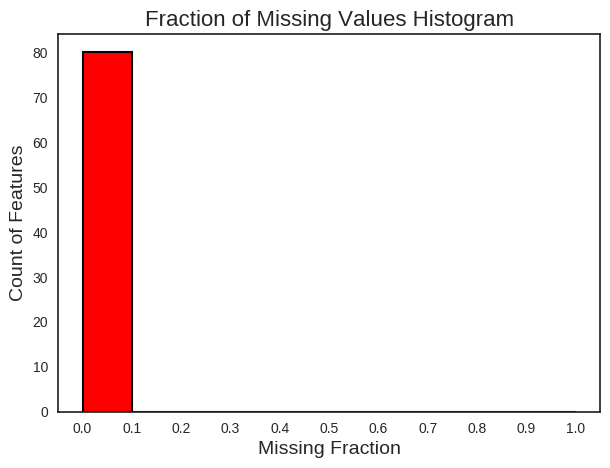

In [0]:
fs.plot_missing()

In [0]:
fs.identify_collinear(correlation_threshold = 0.85)
collinear_features = fs.ops['collinear']
collinear_features

1 features with a correlation magnitude greater than 0.85.



['GarageArea']

In [0]:
X=X.drop(fs.ops['missing'], axis=1)
X=X.drop('Id',axis=1)

In [0]:
#imputation with pandas
#get columns with catagory data type
catCols = list(X.select_dtypes(include=['object']).columns)
numCols = list(X.select_dtypes(exclude=['object']).columns)

# category type filled with most frequent
X[catCols]= X[catCols].fillna\
                            (X[catCols].mode().iloc[0])

#numericals are filled with median
X[numCols]=X[numCols].fillna\
                            (X[numCols].median())


print(X.shape)

(1460, 79)


### Now data has no missing values

In [0]:
fs=FeatureSelector(data = X, labels = y)

fs.identify_missing(missing_threshold = 0.0)
fs.ops

0 features with greater than 0.00 missing values.



{'missing': []}

### log transform the skewed features

In [0]:
from scipy.stats import skew

#As a general rule of thumb, a skewness with an absolute value > 0.5
#is considered at least moderately skewed

skewness = X[numCols].apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print(str(skewness.shape[0]) + \
      " skewed numerical features to log transform")

skewed_features =list(skewness.index)
print(skewed_features,"\n")

X[skewed_features] = np.log1p(X[skewed_features])

28 skewed numerical features to log transform
['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 



### Label encoding for columns with category type

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#only columns with category type will be encoded
X[catCols]=X[catCols].apply(le.fit_transform)

X.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,3,65.0,9.042040,1,1,3,3,0,4,...,0.0,0.0,3,4,1,0.0,2,2008,8,4
1,3.044522,3,80.0,9.169623,1,1,3,3,0,2,...,0.0,0.0,3,4,1,0.0,5,2007,8,4
2,4.110874,3,68.0,9.328212,1,1,0,3,0,4,...,0.0,0.0,3,4,1,0.0,9,2008,8,4


### Combinig some features that are related into new ones

In [0]:
dropList=[]
# Overall quality of the house
X["OverallGrade"] = X["OverallQual"] * X["OverallCond"]
dropList.extend(["OverallQual","OverallCond"])

# Overall quality of the garage
X["GarageGrade"] = X["GarageQual"] * X["GarageCond"]
dropList.extend(["GarageQual","GarageCond"])

# Overall quality of the exterior
X["ExterGrade"] = X["ExterQual"] * X["ExterCond"]
dropList.extend(["ExterQual","ExterCond"])

# Overall kitchen score
X["KitchenScore"] = X["KitchenAbvGr"] * X["KitchenQual"]
dropList.extend(["KitchenAbvGr","KitchenQual"])

# Overall fireplace score
X["FireplaceScore"] = X["Fireplaces"] * X["FireplaceQu"]
dropList.extend(["Fireplaces","FireplaceQu"])

# Overall garage score
X["GarageScore"] = X["GarageArea"] * X["GarageQual"]
dropList.extend(["GarageArea","GarageQual"])

# Overall pool score
X["PoolScore"] = X["PoolArea"] * X["PoolQC"]
dropList.extend(["PoolArea","PoolQC"])

# ified overall quality of the house
X["OverallGrade"] = X["OverallQual"] * X["OverallCond"]
dropList.extend(["OverallQual","OverallCond"])

# ified overall quality of the exterior
X["ExterGrade"] = X["ExterQual"] * X["ExterCond"]
dropList.extend(["ExterQual","ExterCond"])

# ified overall pool score
X["PoolScore"] = X["PoolArea"] * X["PoolQC"]
dropList.extend(["PoolArea","PoolQC"])

# ified overall garage score
X["GarageScore"] = X["GarageArea"] * X["GarageQual"]
dropList.extend(["GarageArea","GarageQual"])

# ified overall fireplace score
X["FireplaceScore"] = X["Fireplaces"] * X["FireplaceQu"]
dropList.extend(["Fireplaces","FireplaceQu"])

# ified overall kitchen score
X["KitchenScore"] = X["KitchenAbvGr"] * X["KitchenQual"]
dropList.extend(["KitchenAbvGr","KitchenQual"])

# Total number of bathrooms
X["TotalBath"] = X["BsmtFullBath"] + (0.5 * X["BsmtHalfBath"]) + \
X["FullBath"] + (0.5 * X["HalfBath"])
dropList.extend(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"])

# Total SF for house (incl. basement)
X["AllSF"] = X["GrLivArea"] + X["TotalBsmtSF"]
dropList.extend(["GrLivArea","TotalBsmtSF"])

# Total SF for 1st + 2nd floors
X["AllFlrsSF"] = X["1stFlrSF"] + X["2ndFlrSF"]
dropList.extend(["1stFlrSF","2ndFlrSF"])

# Total SF for porch
X["AllPorchSF"] = X["OpenPorchSF"] + X["EnclosedPorch"] + \
X["3SsnPorch"] + X["ScreenPorch"]
dropList.extend(["OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"])

X.drop(dropList,axis=1, inplace=True)

In [0]:
columns=np.array(X.columns.values)
print(len(columns))
columns

65


array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'WoodDeckSF', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'OverallGrade',
       'GarageGrade', 'ExterGrade', 'KitchenScore', 'FireplaceScore',
       'GarageScore', 'PoolScore', 'TotalBath', 'AllSF', 'AllFlrsSF',
       'AllPorchSF'], dtype=o

### Scaling the data

In [0]:
from sklearn import preprocessing
X = preprocessing.scale(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


### Spiliting data 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y_logged, test_size=0.33, random_state=42)

### Cross validation scoring function

In [0]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv(model, X, y,folds = 10):
   
    return np.sqrt(-cross_val_score\
                  (model, X, y, scoring = scorer, cv=folds )).reshape(-1,1)
    

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

model_results={}

# Testing Kbest feature Selection

## Simple Regression

#### Using all features

In [0]:
lrg=LinearRegression()
lrg.fit(X_train, y_train)

model_results['simple regression']=rmse_cv(model=lrg,X=X_test,y=y_test).mean()

print("Linear Regression RMSE on Training set :", rmse_cv(model=lrg,X=X_train,y=y_train).mean())
print("Linear Regression RMSE on Test set :", rmse_cv(model=lrg,X=X_test,y=y_test).mean())

Linear Regression RMSE on Training set : 0.15810829152432065
Linear Regression RMSE on Test set : 0.15130642062456703


#### Using kbest method

In [0]:
k_list=[7,15,20,27,30,50]
results={}
j=0
best_val=np.inf

for i in k_list:
    print("====================")

    print(j,"th iteration ,k: ",i)
    kbest=SelectKBest(f_regression, k=i)
    
    #k best features train data 
    X_train_kbest = kbest.fit_transform(X_train, y_train)

    #k best features test data 
    X_test_kbest=kbest.transform(X_test)
    
    lrg=LinearRegression()
    lrg.fit(X_train_kbest, y_train)

    train_acc=rmse_cv(model=lrg,X=X_train_kbest,y=y_train).mean()
    val_acc=rmse_cv(model=lrg,X=X_test_kbest,y=y_test).mean()
    
    results[j]=(train_acc,val_acc)
    j+=1
    
    if val_acc < best_val:
        best_val=val_acc
        best_k=i
        best_X_test=X_test_kbest
        best_X_train=X_train_kbest
        best_selector=kbest
        best_lrg=lrg
        
print("##############################")

indexes = kbest.get_support(indices=True)
cols=columns[indexes]

model_results['regression with {}features'.format(best_k)]=results[k_list.index(best_k)][1]

print('Linear Regression with {}bestFeatures RMSE on Training set :'.format(best_k), results[k_list.index(best_k)][0])
print('Linear Regression with {}kbestFeatures RMSE on Test set :'.format(best_k), results[k_list.index(best_k)][1])

0 th iteration ,k:  7
1 th iteration ,k:  15
2 th iteration ,k:  20
3 th iteration ,k:  27
4 th iteration ,k:  30
5 th iteration ,k:  50
##############################
Linear Regression with 30bestFeatures RMSE on Training set : 0.14991943525729634
Linear Regression with 30kbestFeatures RMSE on Test set : 0.14540888234233332


In [0]:
y_train_pred = best_lrg.predict(best_X_train)
y_test_pred = best_lrg.predict(best_X_test)

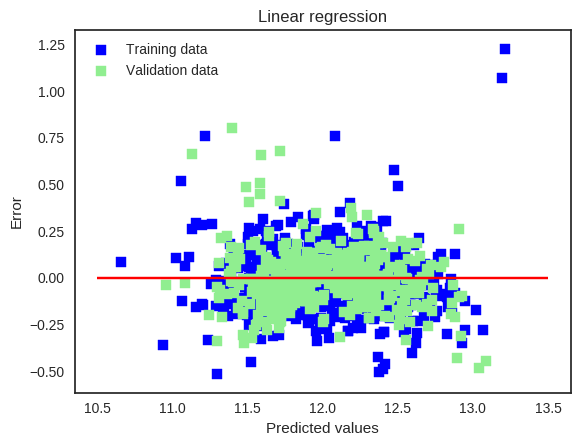

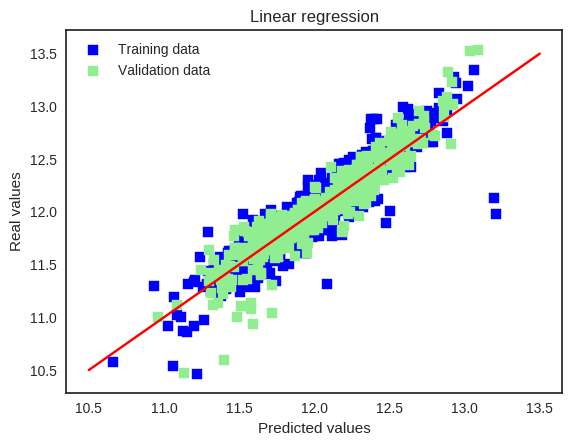

In [0]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Error")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

### Ridge Regualarization (L2 penalty)
Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our cost function.

In [0]:

# no kbest algorithm
# using all features
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
    ridge.fit(X_train, y_train)
    alpha = ridge.alpha_
    print("Best alpha :", alpha)

    print("Try again for more precision with alphas centered around " + str(alpha))
    ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
    ridge.fit(X_train, y_train)
    alpha = ridge.alpha_
    print("Best alpha :", alpha)
    
    model_results["simple Ridge"]=rmse_cv(model=ridge,X=X_test_kbest,y=y_test).mean()
    
    print("Ridge RMSE on Training set :", rmse_cv(model=ridge,X=X_train_kbest,y=y_train).mean())
    print("Ridge RMSE on Test set :", rmse_cv(model=ridge,X=X_test_kbest,y=y_test).mean())


Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 84.0
Ridge RMSE on Training set : 0.14449495236454668
Ridge RMSE on Test set : 0.14765672422118475


In [0]:
# using best k features method

results={}
j=0
best_val=np.inf
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in k_list:
        print(j,"th iteration ,k: ",i)
        kbest=SelectKBest(f_regression, k=i)
    
    #k best features train data 
        X_train_kbest = kbest.fit_transform(X_train, y_train)

    #k best features test data 
        X_test_kbest=kbest.transform(X_test)
    
    #'alphas' are some random values for alpha which 
    # will be multiplied by sum weights
        ridge = RidgeCV(\
        alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
    
        ridge.fit(X_train_kbest, y_train)
        alpha = ridge.alpha_
        print("Best alpha :", alpha)

        print("Try again for more precision with alphas centered around " \
        + str(alpha))

        ridge = RidgeCV(\
            alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
            alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
            alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)

        ridge.fit(X_train_kbest, y_train)
        alpha = ridge.alpha_
        print("Best alpha :", alpha)

        train_acc=rmse_cv(model=ridge,X=X_train_kbest,y=y_train).mean()
        val_acc=rmse_cv(model=ridge,X=X_test_kbest,y=y_test).mean()
    
        results[j]=(train_acc,val_acc)
        j+=1
    
        if val_acc < best_val:
            best_val=val_acc
            best_k=i
            best_X_test=X_test_kbest
            best_X_train=X_train_kbest
            best_ridge=ridge
        
        print("====================")
    
    print("##############################")

    model_results["Ridge with {}features".format(best_k)]= results[k_list.index(best_k)][1] 
  
    print("Best k is : ",best_k)
    print("Ridge with {}features RMSE on Training set :".format(best_k), results[k_list.index(best_k)][0])
    print("Ridge with {}features RMSE on Test set :".format(best_k), results[k_list.index(best_k)][1])

0 th iteration ,k:  7
Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 33.0
1 th iteration ,k:  15
Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 42.0
2 th iteration ,k:  20
Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 66.0
3 th iteration ,k:  27
Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 81.0
4 th iteration ,k:  30
Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 78.0
5 th iteration ,k:  50
Best alpha : 60.0
Try again for more precision with alphas centered around 60.0
Best alpha : 81.0
##############################
Best k is :  30
Ridge with 30features RMSE on Training set : 0.14934658311583762
Ridge with 30features RMSE on Test set : 0.1452028744900641


In [0]:
y_train_rdg = best_ridge.predict(best_X_train)
y_test_rdg = best_ridge.predict(best_X_test)

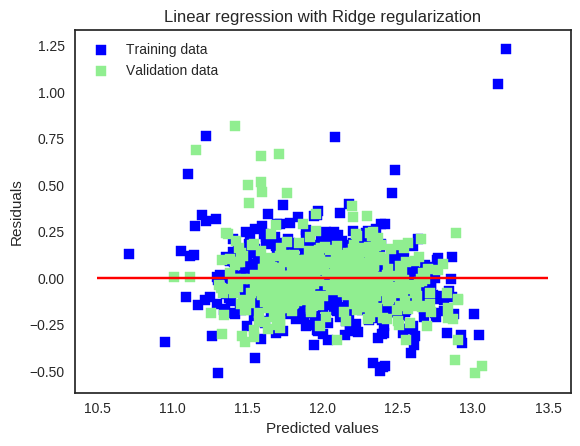

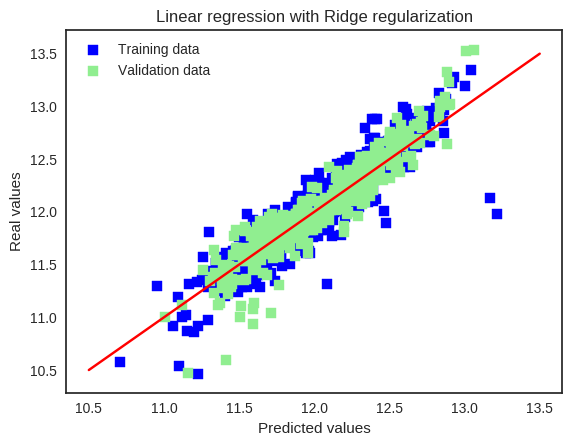

In [0]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# # Plot important coefficients
# coefs = pd.Series(best_ridge.coef_, index = data.columns)
# print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the Ridge Model")
# plt.show()

### Linear Regression with Lasso regularization (L1 penalty)
It can be useful in practice if we have a high dimensional dataset with many features that are irrelevant.

We can suspect that it should be more efficient than Ridge here.

In [0]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

model_results['simple Lasso']=rmse_cv(lasso,X_test,y_test).mean()

print("Lasso RMSE on Training set :", rmse_cv(lasso,X_train,y_train).mean())
print("Lasso RMSE on Test set :", rmse_cv(lasso,X_test,y_test).mean())

Best alpha : 0.01
Try again for more precision with alphas centered around 0.01
Best alpha : 0.0085
Lasso RMSE on Training set : 0.1528008692316461
Lasso RMSE on Test set : 0.14310040146658753


In [0]:

results={}
j=0
best_val=np.inf

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in k_list:
        print(j,"th iteration ,k: ",i)
        kbest=SelectKBest(f_regression, k=i)
    
    #k best features train data 
        X_train_kbest = kbest.fit_transform(X_train, y_train)

    #k best features test data 
        X_test_kbest=kbest.transform(X_test)    
    
        lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
        lasso.fit(X_train_kbest, y_train)
        alpha = lasso.alpha_
        print("Best alpha :", alpha)

        print("Try again for more precision with alphas centered around " + str(alpha))
        lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
        lasso.fit(X_train_kbest, y_train)
        alpha = lasso.alpha_
        print("Best alpha :", alpha)
        train_acc=rmse_cv(model=ridge,X=X_train_kbest,y=y_train).mean()
        val_acc=rmse_cv(model=ridge,X=X_test_kbest,y=y_test).mean()
    
        results[j]=(train_acc,val_acc)
        j+=1
    
        if val_acc < best_val:
            best_val=val_acc
            best_k=i
            best_X_test=X_test_kbest
            best_X_train=X_train_kbest
            best_lasso=lasso
        
        print("====================")
    
    print("##############################")

    model_results["Lasso with {}features".format(best_k)]= results[k_list.index(best_k)][1] 
  
    print("Best k is : ",best_k)
    print("Lasso with {}features RMSE on Training set :".format(best_k), results[k_list.index(best_k)][0])
    print("Lasso with {}features RMSE on Test set :".format(best_k), results[k_list.index(best_k)][1])

0 th iteration ,k:  7
Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00057
1 th iteration ,k:  15
Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.0039000000000000003
2 th iteration ,k:  20
Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.0042
3 th iteration ,k:  27
Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.0039000000000000003
4 th iteration ,k:  30
Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.0033000000000000004
5 th iteration ,k:  50
Best alpha : 0.003
Try again for more precision with alphas centered around 0.003
Best alpha : 0.00345
##############################
Best k is :  30
Lasso with 30features RMSE on Training set : 0.14934658311583762
Lasso with 30features RMSE on Test set : 0.1452028744900641


In [0]:
y_train_las = best_lasso.predict(best_X_train)
y_test_las = best_lasso.predict(best_X_test)

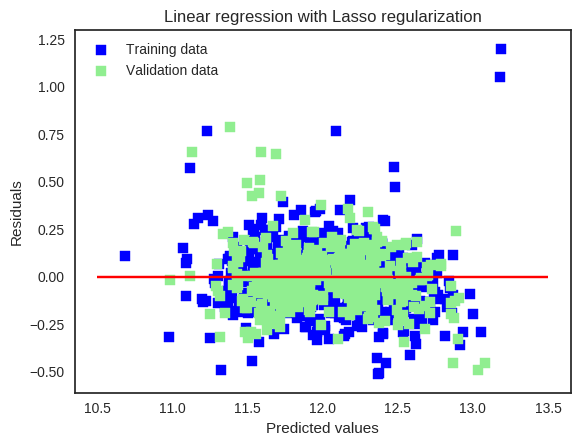

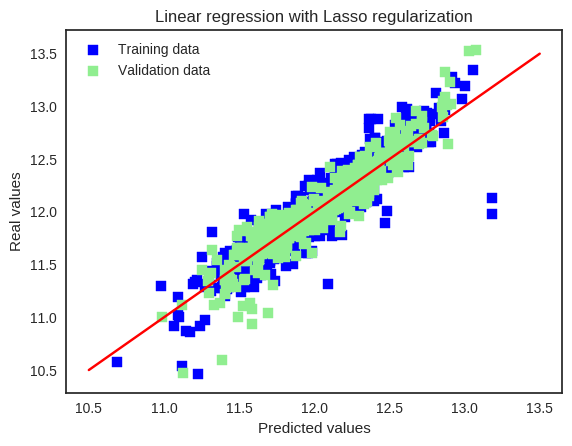

In [0]:
#Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# # Plot important coefficients
# coefs = pd.Series(lasso.coef_, index = X_train.columns)
# print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#       str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")
# plt.show()

### ElesticNet

In [0]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

model_results['simple ElesticNet']=rmse_cv(elasticNet,X_test,y_test).mean()

print("ElesticNet RMSE on Training set :", rmse_cv(elasticNet,X_train,y_train).mean())
print("ElesticNet RMSE on Test set :", rmse_cv(elasticNet,X_test,y_test).mean())



Best l1_ratio : 0.1
Best alpha : 0.06
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.1
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.08000000000000002
ElesticNet RMSE on Training set : 0.15252624391682842
ElesticNet RMSE on Test set : 0.14283800021797205


In [0]:
# using best k features method

results={}
j=0
best_val=np.inf
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in k_list:
        print(j,"th iteration ,k: ",i)
        kbest=SelectKBest(f_regression, k=i)
    
        #k best features train data 
        X_train_kbest = kbest.fit_transform(X_train, y_train)

        #k best features test data 
        X_test_kbest=kbest.transform(X_test)
        
        elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
        elasticNet.fit(X_train_kbest, y_train)
        alpha = elasticNet.alpha_
        ratio = elasticNet.l1_ratio_
        print("Best l1_ratio :", ratio)
        print("Best alpha :", alpha )

        print("Try again for more precision with l1_ratio centered around " + str(ratio))
        elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
        elasticNet.fit(X_train_kbest, y_train)
        if (elasticNet.l1_ratio_ > 1):
            elasticNet.l1_ratio_ = 1    
        alpha = elasticNet.alpha_
        ratio = elasticNet.l1_ratio_
        print("Best l1_ratio :", ratio)
        print("Best alpha :", alpha )

        print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
        " and alpha centered around " + str(alpha))
        elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
        elasticNet.fit(X_train_kbest, y_train)
        if (elasticNet.l1_ratio_ > 1):
            elasticNet.l1_ratio_ = 1    
        alpha = elasticNet.alpha_
        ratio = elasticNet.l1_ratio_
        print("Best l1_ratio :", ratio)
        print("Best alpha :", alpha )

        train_acc=rmse_cv(model=ridge,X=X_train_kbest,y=y_train).mean()
        val_acc=rmse_cv(model=ridge,X=X_test_kbest,y=y_test).mean()
    
        results[j]=(train_acc,val_acc)
        j+=1
    
        if val_acc < best_val:
            best_val=val_acc
            best_k=i
            best_X_test=X_test_kbest
            best_X_train=X_train_kbest
            best_elestic=elasticNet
        
        print("====================")
    
    print("##############################")

    model_results["ElesticNet with {}features".format(best_k)]= results[k_list.index(best_k)][1] 

    print("Best k is : ",best_k)
    print("ElesticNet with {}features RMSE on Training set :", results[k_list.index(best_k)][0])
    print("ElesticNet with {}features RMSE on Test set :", results[k_list.index(best_k)][1])

0 th iteration ,k:  7
Best l1_ratio : 0.1
Best alpha : 0.01
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.085
Best alpha : 0.01
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.01
Best l1_ratio : 0.085
Best alpha : 0.013999999999999999
1 th iteration ,k:  15
Best l1_ratio : 0.1
Best alpha : 0.03
Try again for more precision with l1_ratio centered around 0.1
Best l1_ratio : 0.11499999999999999
Best alpha : 0.03
Now try again for more precision on alpha, with l1_ratio fixed at 0.11499999999999999 and alpha centered around 0.03
Best l1_ratio : 0.11499999999999999
Best alpha : 0.0315
2 th iteration ,k:  20
Best l1_ratio : 0.7
Best alpha : 0.006
Try again for more precision with l1_ratio centered around 0.7
Best l1_ratio : 0.6649999999999999
Best alpha : 0.006
Now try again for more precision on alpha, with l1_ratio fixed at 0.6649999999999999 and alpha centered around 0.006
Best l1_ratio : 0.6649999999999

In [0]:
y_train_ela = best_elestic.predict(best_X_train)
y_test_ela = best_elestic.predict(best_X_test)

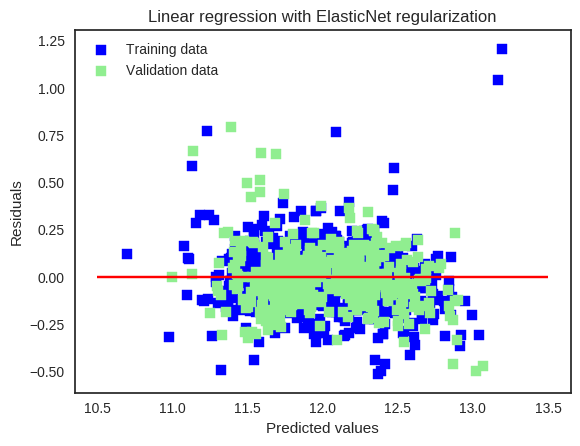

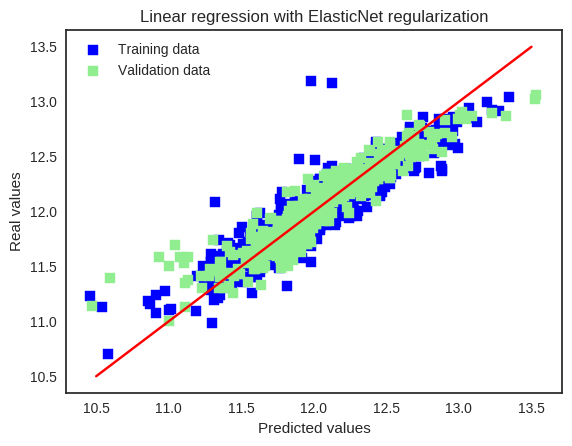

In [0]:
# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# # Plot important coefficients
# coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
# print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
# imp_coefs = pd.concat([coefs.sort_values().head(10),
#                      coefs.sort_values().tail(10)])
# imp_coefs.plot(kind = "barh")
# plt.title("Coefficients in the ElasticNet Model")
# plt.show()

# Result :

#### Using k best features method from sklearn helps the simple regression and Ridge models but it is not helpful to neither Lasso nor ElesticNet models

In [0]:
model_results

{'ElesticNet with 30features': 0.1452028744900641,
 'Lasso with 30features': 0.1452028744900641,
 'Ridge with 30features': 0.1452028744900641,
 'regression with 30features': 0.14540888234233332,
 'simple ElesticNet': 0.14283800021797205,
 'simple Lasso': 0.14310040146658753,
 'simple Ridge': 0.14765672422118475,
 'simple regression': 0.15130642062456703}

### because lasso regression can remove useless features itself it will probably work better without our interference in feature selection